In [1]:
!pip install soundfile simpleaudio
!pip install librosa scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for simpleaudio
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (simpleaudio)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
from scipy.signal import resample

In [5]:
# Reading and displaying the info of the audio file
audio_file = '/content/audio1.wav'
signal, sr = librosa.load(audio_file, sr=None)
duration = len(signal) / sr
print("Sampling Rate:", sr)
print("Number of Samples:", len(signal))
print("Bit Depth:", signal.dtype)
print("Total Duration (sec):", duration)

Sampling Rate: 22050
Number of Samples: 167226
Bit Depth: float32
Total Duration (sec): 7.583945578231292


In [4]:
# Play the audio
from IPython.display import Audio

Audio('/content/audio1.wav')

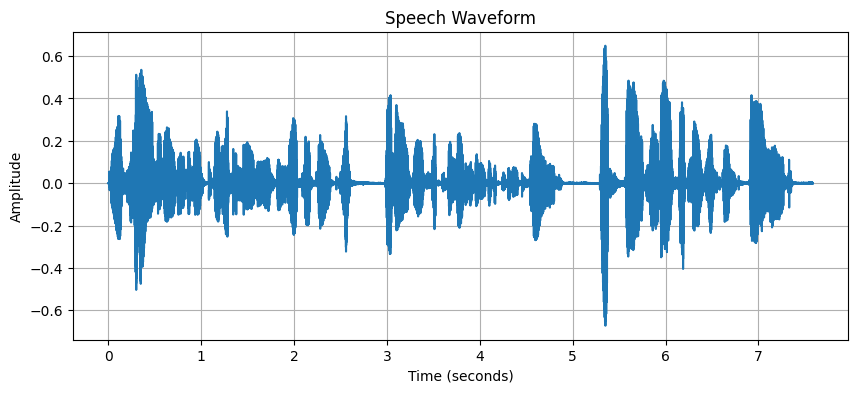

In [6]:
# Waveform of time-domain signal
time = np.linspace(0, duration, len(signal))

plt.figure(figsize=(10,4))
plt.plot(time, signal)
plt.title("Speech Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [7]:
# Active Speech Duration

energy = signal ** 2
threshold = 0.01 * np.max(energy)
active_samples = energy > threshold
active_duration = np.sum(active_samples) / sr

print("Active Speech Duration (sec):", active_duration)

Active Speech Duration (sec): 1.3404081632653062


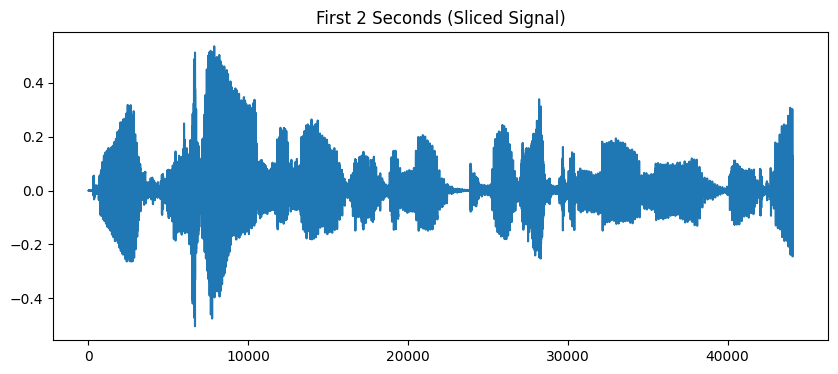

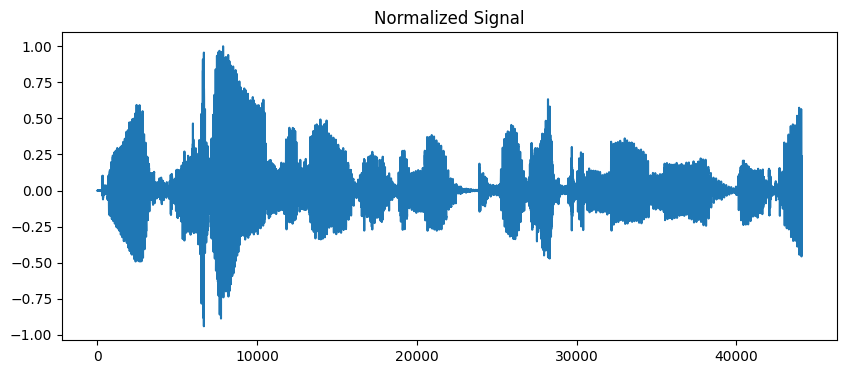

In [8]:
# Slicing & Normalization
slice_2sec = signal[:2 * sr]

normalized_signal = slice_2sec / np.max(np.abs(slice_2sec))

plt.figure(figsize=(10,4))
plt.plot(slice_2sec)
plt.title("First 2 Seconds (Sliced Signal)")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(normalized_signal)
plt.title("Normalized Signal")
plt.show()

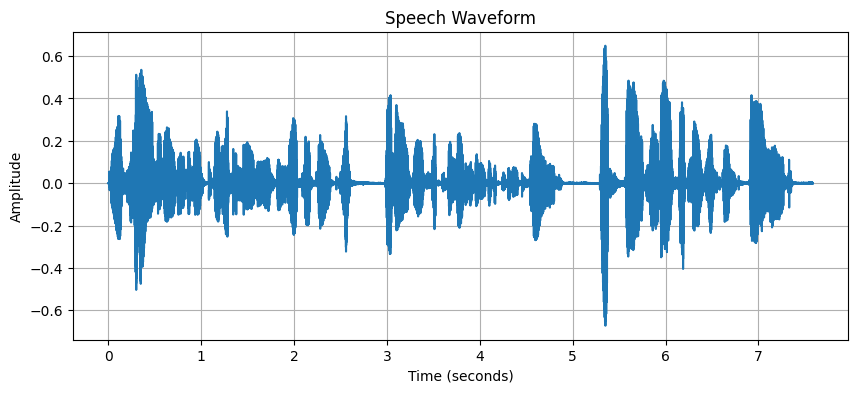

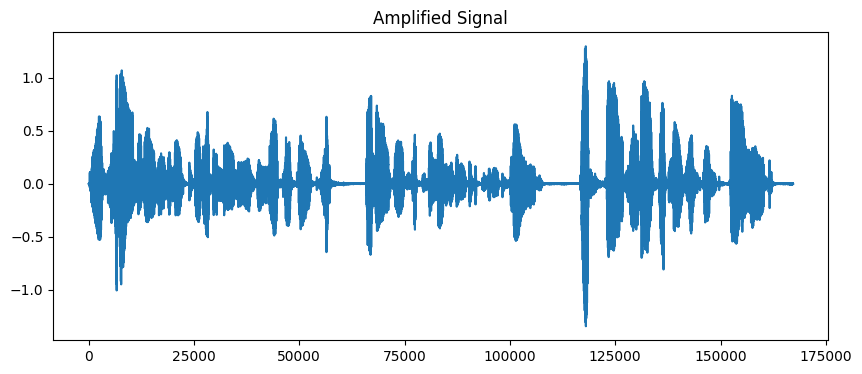

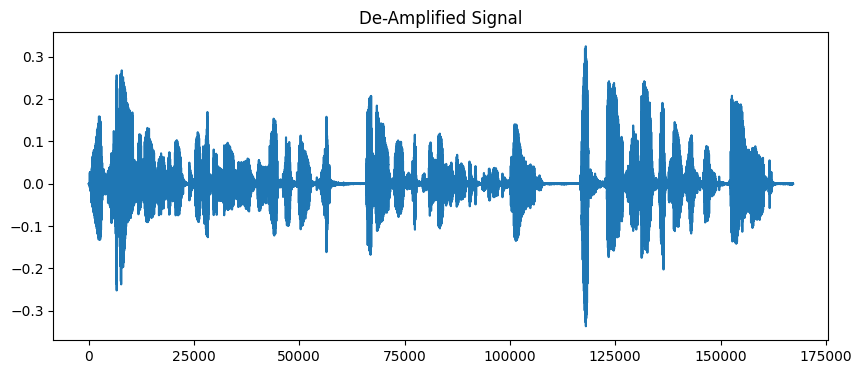

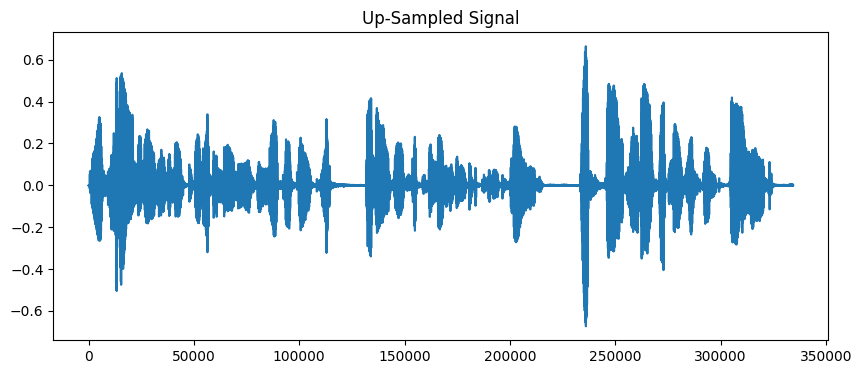

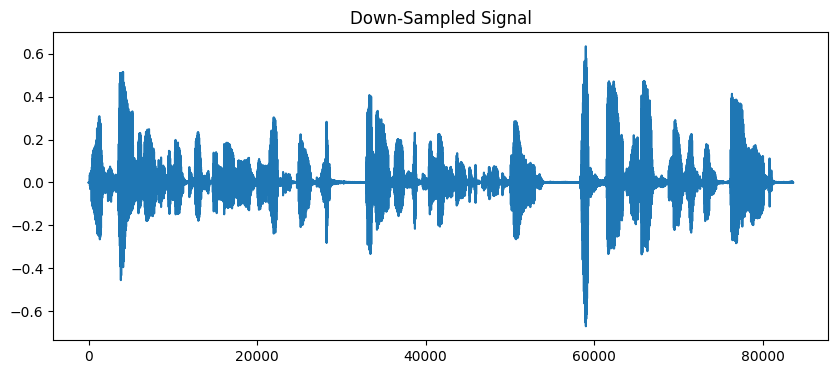

In [10]:
# Operations
amplified = signal * 2
deamplified = signal * 0.5

# Upsampling (2x)
upsampled = resample(signal, len(signal) * 2)

# Downsampling (0.5x)
downsampled = resample(signal, len(signal) // 2)

plt.figure(figsize=(10,4))
plt.plot(time, signal)
plt.title("Speech Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
print()

plt.figure(figsize=(10,4))
plt.plot(amplified)
plt.title("Amplified Signal")
plt.show()
print()

plt.figure(figsize=(10,4))
plt.plot(deamplified)
plt.title("De-Amplified Signal")
plt.show()
print()

plt.figure(figsize=(10,4))
plt.plot(upsampled)
plt.title("Up-Sampled Signal")
plt.show()
print()

plt.figure(figsize=(10,4))
plt.plot(downsampled)
plt.title("Down-Sampled Signal")
plt.show()
print()

In [12]:
import numpy as np
import matplotlib.pyplot as plt


frame_length = int(0.02 * sr)   # 20 ms
hop_length = int(0.01 * sr)     # 10 ms

energy = []

for i in range(0, len(signal) - frame_length, hop_length):
    frame = signal[i:i+frame_length]
    energy.append(np.sum(frame**2))

energy = np.array(energy)

# Thresholds
silence_th = 0.01 * np.max(energy)
voiced_th = 0.1 * np.max(energy)

# =========================
# Classify frames
# =========================
silence_frames = energy < silence_th
voiced_frames = energy > voiced_th
unvoiced_frames = (energy >= silence_th) & (energy <= voiced_th)

# Time axis for frames
time_frames = np.arange(len(energy)) * hop_length / sr


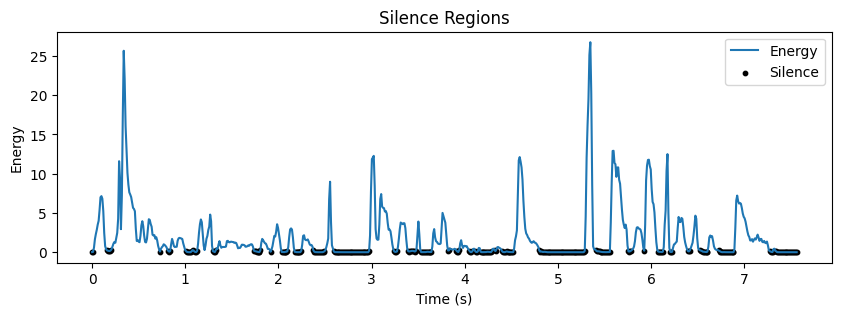

In [13]:
plt.figure(figsize=(10,3))
plt.plot(time_frames, energy, label="Energy")
plt.scatter(time_frames[silence_frames],
            energy[silence_frames],
            color='black', s=10, label="Silence")
plt.title("Silence Regions")
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()
plt.show()

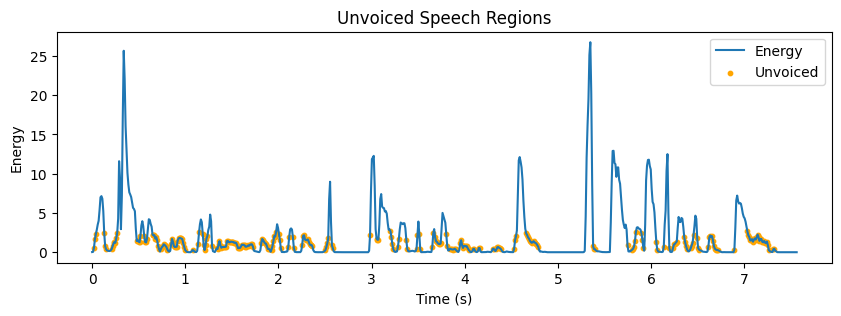

In [14]:
plt.figure(figsize=(10,3))
plt.plot(time_frames, energy, label="Energy")
plt.scatter(time_frames[unvoiced_frames],
            energy[unvoiced_frames],
            color='orange', s=10, label="Unvoiced")
plt.title("Unvoiced Speech Regions")
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()
plt.show()

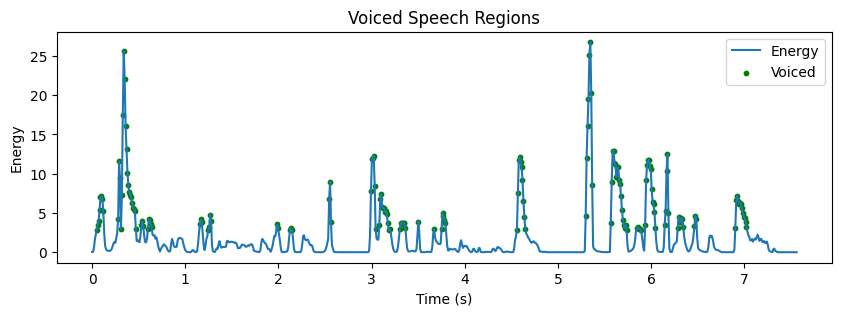

In [15]:
plt.figure(figsize=(10,3))
plt.plot(time_frames, energy, label="Energy")
plt.scatter(time_frames[voiced_frames],
            energy[voiced_frames],
            color='green', s=10, label="Voiced")
plt.title("Voiced Speech Regions")
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()
plt.show()